In [13]:
from loader.Pouring_dataset import Pouring
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
import skdim

In [14]:
ds = Pouring()
X = ds.traj_data_
bs = len(X)
X = X.view(bs, -1)

Pouring dataset is ready; # of trajectories: 10


## Global Dimension

In [15]:
## global PCA
X = X - X.mean(dim=0, keepdim=True)
eigh = torch.linalg.eigh(X.permute(1, 0)@X)

In [16]:
ratio = eigh.eigenvalues[-16:]/eigh.eigenvalues[-16:].sum()
cusum_vals = torch.cumsum(ratio.sort(descending=True).values, dim=0)

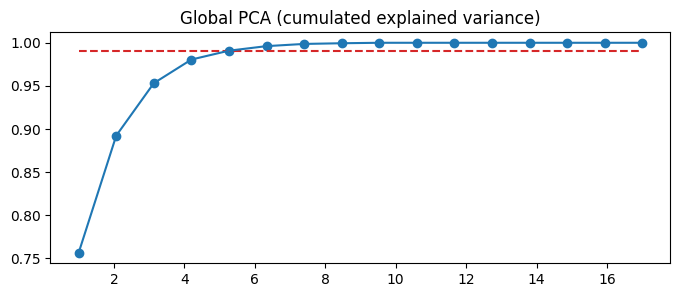

In [17]:
plt.figure(figsize=(8, 3))
plt.scatter(torch.linspace(1, len(cusum_vals)+1, len(cusum_vals)), cusum_vals, c='tab:blue')
plt.plot(torch.linspace(1, len(cusum_vals)+1, len(cusum_vals)), cusum_vals, c='tab:blue')
plt.hlines(0.99, xmin=1, xmax=17, colors='tab:red', linestyles='--')
plt.title("Global PCA (cumulated explained variance)")
plt.show()

## Intrinsic Dimension Estimation

In [71]:
skdim.id.TwoNN(0.1).fit_transform(X)
# Facco, E. et al. (2019), 
# Estimating the intrinsic dimension of datasets by a minimal neighborhood information., 
# Nature.

1.434757471778402

In [72]:
skdim.id.FisherS().fit_transform(X)
# Albergante, L., et al. (2019), 
# Estimating the effective dimension of large biological datasets using Fisher separability analysis., 
# 2019 International Joint Conference on Neural Networks, IEEE.

2.242837576486538

In [73]:
skdim.id.MADA().fit_transform(X)
# Farahmand, et al. (2007), 
# Manifold-adaptive dimension estimation., 
# International Conference on Machine Learning.


2.082079347970093

In [74]:
skdim.id.MLE().fit_transform(X)
# Levina, E. and Bickel., P. J. (2005), 
# Maximum likelihood estimation of intrinsic dimension. 
# Advances in Neural Information Processing Systems 17, 777-784. MIT Press.

1.9023836410670019